# Lorenz Equations

In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [20]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [21]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    ∂x/∂t = σ(y − x)
    ∂y/∂t = ρx − y − xz
    ∂z/∂t = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    dxdt = sigma*(x[1] - x[0])
    dydt = ro*x[0] - x[1] - x[0]*x[2]
    dzdt = x[0]*x[1] - beta*x[2]
    return dxdt, dydt, dzdt

<IPython.core.display.Javascript object>


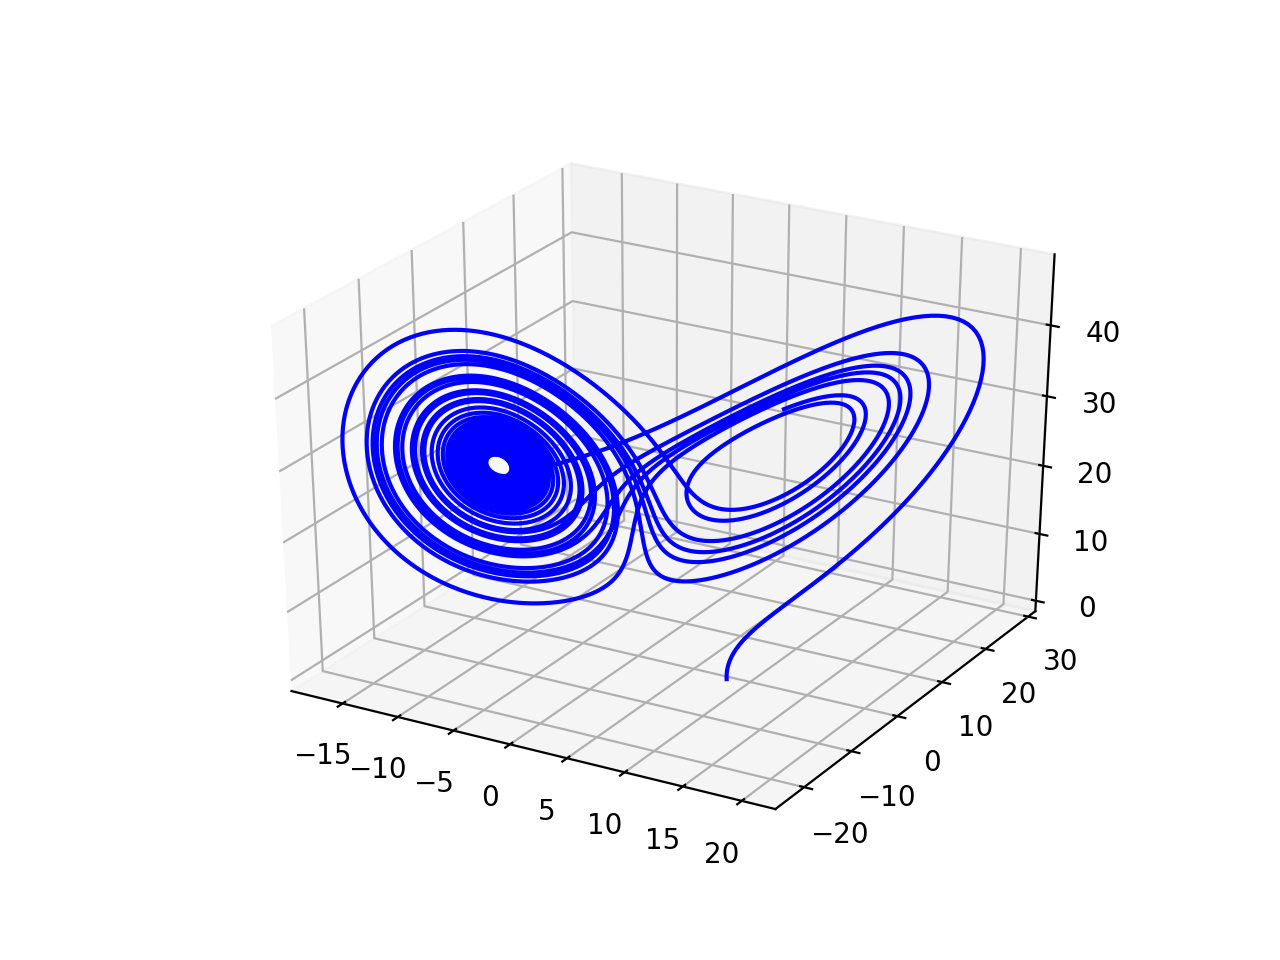

In [22]:
# Parameters
sigma, ro, beta = 10, 28, 8/3
# Initial value
x = np.random.uniform(-15, 15, (3))
t = np.linspace(-15,15, 10000)
# Solve ode
sol = odeint(lorenz, x, t)
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color='b')

plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


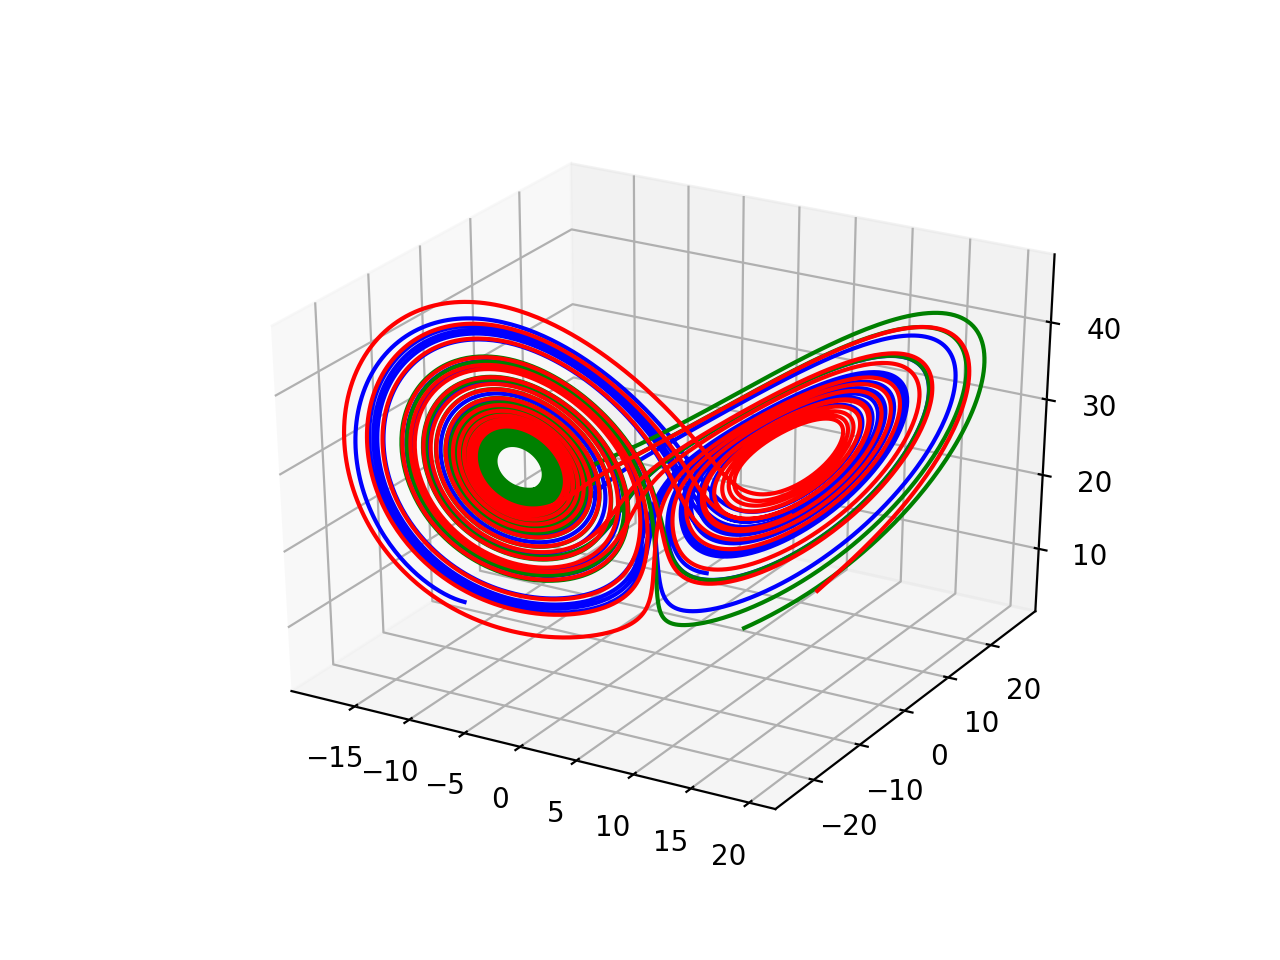

In [51]:
# Parameters
sigma, ro, beta = 10, 28, 8/3
# Initial values
x = np.random.uniform(-15, 15, (3,3))
t = np.linspace(-10,10, 10000)
fig = plt.figure()
# Solve ode
sol1 = odeint(lorenz, x[0], t)
sol2 = odeint(lorenz, x[1], t)
sol3 = odeint(lorenz, x[2], t)
# Plot
ax = fig.gca(projection='3d')
ax.plot(sol1[:,0], sol1[:,1], sol1[:,2], color='b')
ax.plot(sol2[:,0], sol2[:,1], sol2[:,2], color='g')
ax.plot(sol3[:,0], sol3[:,1], sol3[:,2], color='r')

plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

<IPython.core.display.Javascript object>


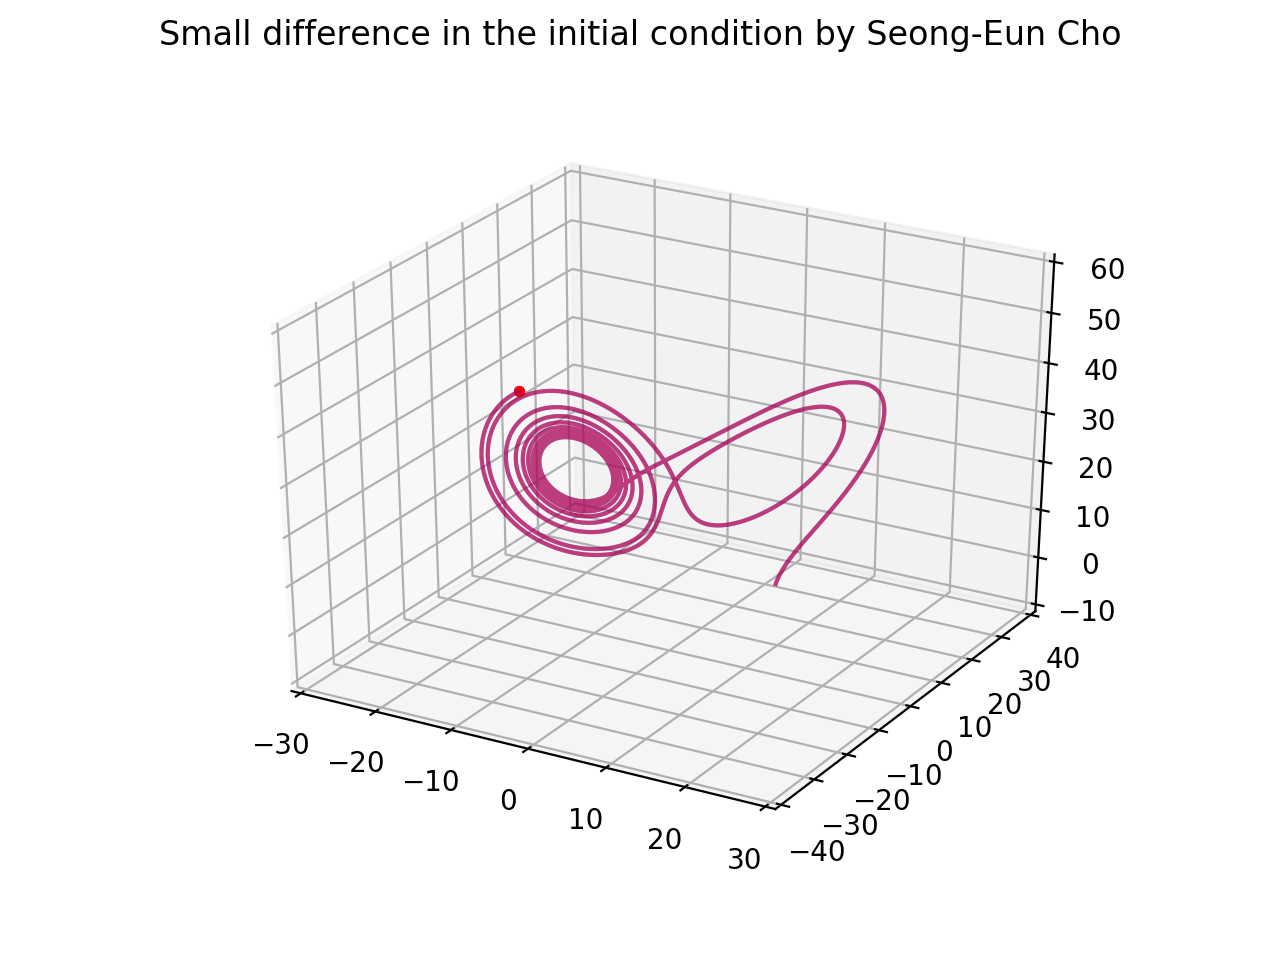

In [16]:
# Parameters
sigma, ro, beta = 10, 28, 8/3
# Inital values
x = np.random.uniform(-15, 15, 3)
x2 = x + np.random.randn(3)*(1e-10)
t = np.linspace(-15, 15, 20000)
# Solve ode
sol1 = odeint(lorenz, x, t)
sol2 = odeint(lorenz, x2, t)

# Animate
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim((-30, 30))
ax.set_ylim((-40, 40))
ax.set_zlim((-10, 60))
p1, = plt.plot([], [], [], marker='o', markersize=3, color='b')
p2, = plt.plot([], [], [], marker='o', markersize=3, color='r')
t1, = plt.plot([], [], [], color='b', alpha=0.5)
t2, = plt.plot([], [], [], color='r', alpha=0.5)

def update(i):
    p1.set_data(sol1[i,0], sol1[i,1])
    p1.set_3d_properties(sol1[i,2])
    t1.set_data(sol1[:i+1,0], sol1[:i+1,1])
    t1.set_3d_properties(sol1[:i+1,2])
    
    p2.set_data(sol2[i,0], sol2[i,1])
    p2.set_3d_properties(sol2[i,2])
    t2.set_data(sol2[:i+1,0], sol2[:i+1,1])
    t2.set_3d_properties(sol2[:i+1,2])

    return p1, t1, p2, t2

ani = animation.FuncAnimation(fig, update, frames=range(20000), interval=2)
plt.suptitle("Small difference in the initial condition by Seong-Eun Cho")
# Save animation
ani.save("lorenz_animation1.mp4")

<video src='lorenz_animation1.mp4' controls>

"## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-14, rtol=1e-12)` for the first approximation and `(atol=1e-15, rtol=1e-13)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

<IPython.core.display.Javascript object>


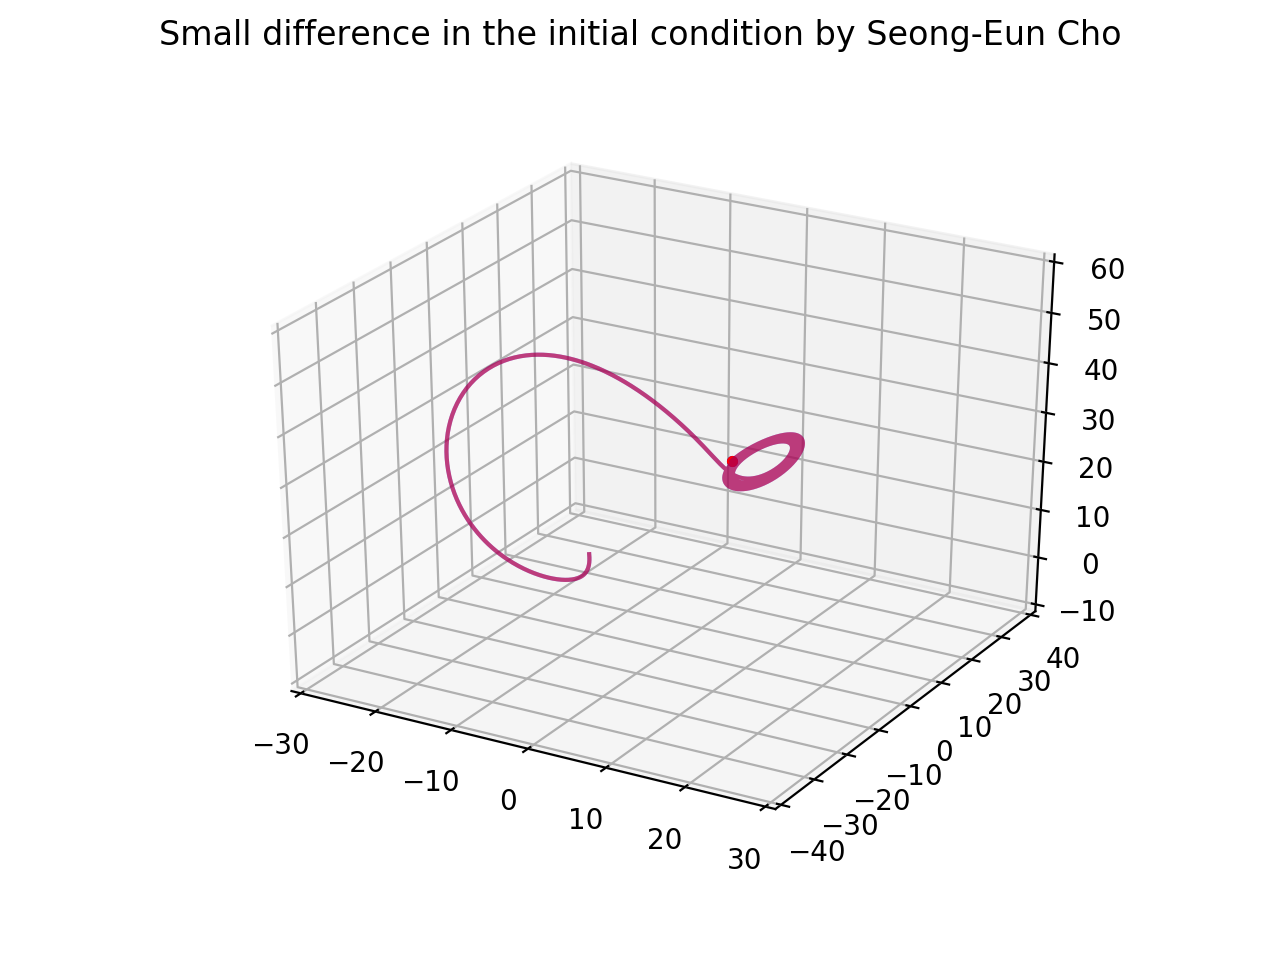

In [17]:
# Parameters
sigma, ro, beta = 10, 28, 8/3
# Initial values
x = np.random.uniform(-15, 15, 3)
t = np.linspace(-15, 15, 20000)
# Solve ode
sol1 = odeint(lorenz, x, t, atol=1e-14, rtol=1e-12)
sol2 = odeint(lorenz, x, t, atol=1e-15, rtol=1e-13)
# Animate
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim((-30, 30))
ax.set_ylim((-40, 40))
ax.set_zlim((-10, 60))
p1, = plt.plot([], [], [], marker='o', markersize=3, color='b')
p2, = plt.plot([], [], [], marker='o', markersize=3, color='r')
t1, = plt.plot([], [], [], color='b', alpha=0.5)
t2, = plt.plot([], [], [], color='r', alpha=0.5)

def update(i):
    p1.set_data(sol1[i,0], sol1[i,1])
    p1.set_3d_properties(sol1[i,2])
    t1.set_data(sol1[:i+1,0], sol1[:i+1,1])
    t1.set_3d_properties(sol1[:i+1,2])
    
    p2.set_data(sol2[i,0], sol2[i,1])
    p2.set_3d_properties(sol2[i,2])
    t2.set_data(sol2[:i+1,0], sol2[:i+1,1])
    t2.set_3d_properties(sol2[:i+1,2])

    return p1, t1, p2, t2

ani = animation.FuncAnimation(fig, update, frames=range(20000), interval=2)
plt.suptitle("Small difference in the initial condition by Seong-Eun Cho")
# Save animation
ani.save("lorenz_animation2.mp4")

<video src='lorenz_animation2.mp4' controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by picking a random initial condition, and then solving the system forward in time for a while.
* Produce a second initial condition by adding a small perturbation: `np.random.randn(3)*(1e-10)`.
* For both initial conditions, use odeint to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the difference between the two approximate solutions.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Print your estimate for $\lambda$. Also use `plt.semilogy` to produce a semilog plot of $||\delta(t)||$ and the best-fit line you calculated.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, respectively, the best-fit exponential can be plotted on a semilog plot using `plt.semilogy(t,np.exp(a*t+b))`.

Lambda: 0.9182362096237123


<IPython.core.display.Javascript object>


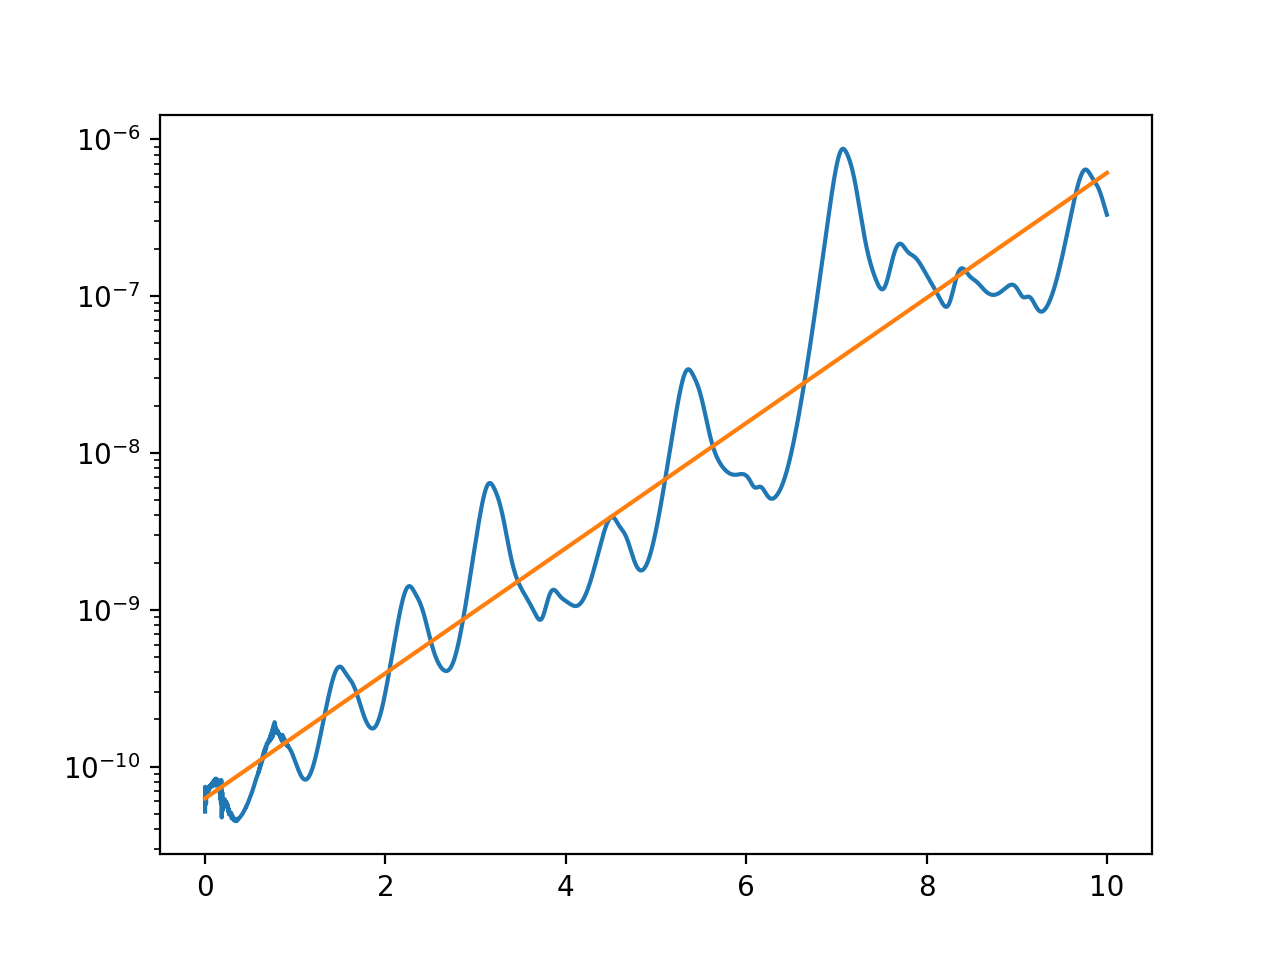

In [54]:
import scipy as sp
# Parameters
sigma, ro, beta = 10, 28, 8/3
# Random initial
x = np.random.uniform(-15, 15, 3)
x2 = x + np.random.randn(3)*(1e-10)
t = np.linspace(0, 10, 20000)
# Solve ode to get value that lies on the attractor
sol1 = odeint(lorenz, x, t)
sol2 = odeint(lorenz, x2, t)
# find the norm of the difference
delta = sol1-sol2
norm = np.linalg.norm(delta, axis=1)
# Regress
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(t, np.log(norm))
# Print the lambda value
print("Lambda: {}".format(slope))
# Plot
fig = plt.figure()
plt.semilogy(t, norm)
plt.semilogy(t, np.exp(slope*t + intercept))
plt.show()